# Assignment 2 - Q-Learning and Expected Sarsa

Welcome to Course 2 Programming Assignment 2. In this notebook, you will:

- Implement Q-Learning with $\epsilon$-greedy action selection
- Implement Expected Sarsa with $\epsilon$-greedy action selection
- Investigate how these two algorithms behave on Cliff World (described on page 132 of the textbook)

We will provide you with the environment and infrastructure to run an experiment (called the experiment program in RL-Glue). This notebook will provide all the code you need to run your experiment and visualise learning performance.

This assignment will be graded automatically by comparing the behavior of your agent to our implementations of Expected Sarsa and Q-learning. The random seed will be set to avoid different behavior due to randomness. **You should not call any random functions in this notebook.** It will affect the agent's random state and change the results.

## Packages

You will need the following libraries for this assignment. We are using:
1. numpy: the fundamental package for scientific computing with Python.
2. scipy: a Python library for scientific and technical computing.
3. matplotlib: library for plotting graphs in Python.
4. RL-Glue: library for reinforcement learning experiments.

**Please do not import other libraries** — this will break the autograder.

In [21]:
%matplotlib inline
import numpy as np
from scipy.stats import sem
import matplotlib.pyplot as plt
from rl_glue import RLGlue
import agent
import cliffworld_env
from tqdm import tqdm
import pickle

In [22]:
plt.rcParams.update({'font.size': 15})
plt.rcParams.update({'figure.figsize': [10,5]})

## Section 1: Q-Learning

In this section you will implement and test a Q-Learning agent with $\epsilon$-greedy action selection (Section 6.5 in the textbook). 

### Implementation

Your job is to implement the updates in the methods agent_step and agent_end. We provide detailed comments in each method describing what your code should do.

In [34]:
# [Graded]
# Q-Learning agent here
class QLearningAgent(agent.BaseAgent):
    def agent_init(self, agent_init_info):
        """Setup for the agent called when the experiment first starts.
        
        Args:
        agent_init_info (dict), the parameters used to initialize the agent. The dictionary contains:
        {
            num_states (int): The number of states,
            num_actions (int): The number of actions,
            epsilon (float): The epsilon parameter for exploration,
            step_size (float): The step-size,
            discount (float): The discount factor,
        }
        
        """
        # Store the parameters provided in agent_init_info.
        self.num_actions = agent_init_info["num_actions"]
        self.num_states = agent_init_info["num_states"]
        self.epsilon = agent_init_info["epsilon"]
        self.step_size = agent_init_info["step_size"]
        self.discount = agent_init_info["discount"]
        self.rand_generator = np.random.RandomState(agent_info["seed"])
        
        # Create an array for action-value estimates and initialize it to zero.
        self.q = np.zeros((self.num_states, self.num_actions)) # The array of action-value estimates.

        
    def agent_start(self, state):
        """The first method called when the episode starts, called after
        the environment starts.
        Args:
            state (int): the state from the
                environment's evn_start function.
        Returns:
            action (int): the first action the agent takes.
        """
        
        # Choose action using epsilon greedy.
        current_q = self.q[state,:]
        if self.rand_generator.rand() < self.epsilon:
            action = self.rand_generator.randint(self.num_actions)
        else:
            action = self.argmax(current_q)
        self.prev_state = state
        self.prev_action = action
        return action
    
    def agent_step(self, reward, state):
        """A step taken by the agent.
        Args:
            reward (float): the reward received for taking the last action taken
            state (int): the state from the
                environment's step based on where the agent ended up after the
                last step.
        Returns:
            action (int): the action the agent is taking.
        """
        
        # Choose action using epsilon greedy.
        current_q = self.q[state, :]
        if self.rand_generator.rand() < self.epsilon:
            action = self.rand_generator.randint(self.num_actions)
        else:
            action = self.argmax(current_q)
        
        # Perform an update (1 line)
        ### START CODE HERE ###
        self.q[self.prev_state, self.prev_action] = self.q[self.prev_state, self.prev_action] + self.step_size * (reward + self.discount * self.q[state, action] - self.q[self.prev_state, self.prev_action])
        ### END CODE HERE ###
        
        self.prev_state = state
        self.prev_action = action
        return action
    
    def agent_end(self, reward):
        """Run when the agent terminates.
        Args:
            reward (float): the reward the agent received for entering the
                terminal state.
        """
        # Perform the last update in the episode (1 line)
        ### START CODE HERE ###        
        self.q[self.prev_state, self.prev_action]=self.q[self.prev_state, self.prev_action] - self.step_size * self.q[self.prev_state, self.prev_action]
        ### END CODE HERE ###
        
    def argmax(self, q_values):
        """argmax with random tie-breaking
        Args:
            q_values (Numpy array): the array of action-values
        Returns:
            action (int): an action with the highest value
        """
        top = float("-inf")
        ties = []

        for i in range(len(q_values)):
            if q_values[i] > top:
                top = q_values[i]
                ties = []

            if q_values[i] == top:
                ties.append(i)

        return self.rand_generator.choice(ties)

### Test

Run the cells below to test the implemented methods. The output of each cell should match the expected output.

Note that passing this test does not guarantee correct behavior on the Cliff World.

In [24]:
# Do not modify this cell!

## Test Code for agent_start() ##

agent_info = {"num_actions": 4, "num_states": 3, "epsilon": 0.1, "step_size": 0.1, "discount": 1.0, "seed": 0}
current_agent = QLearningAgent()
current_agent.agent_init(agent_info)
action = current_agent.agent_start(0)
print("Action Value Estimates: \n", current_agent.q)
print("Action:", action)

Action Value Estimates: 
 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 1


**Expected Output:**

```
Action Value Estimates: 
 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 1
```

In [25]:
# Do not modify this cell!

## Test Code for agent_step() ##

actions = []
agent_info = {"num_actions": 4, "num_states": 3, "epsilon": 0.1, "step_size": 0.1, "discount": 1.0, "seed": 0}
current_agent = QLearningAgent()
current_agent.agent_init(agent_info)
actions.append(current_agent.agent_start(0))
actions.append(current_agent.agent_step(2, 1))
actions.append(current_agent.agent_step(0, 0))
print("Action Value Estimates: \n", current_agent.q)
print("Actions:", actions)

Action Value Estimates: 
 [[0.   0.2  0.   0.  ]
 [0.   0.   0.   0.02]
 [0.   0.   0.   0.  ]]
Actions: [1, 3, 1]


**Expected Output:**

```
Action Value Estimates: 
 [[ 0.   0.2  0.   0. ]
 [ 0.   0.   0.  0.02]
 [ 0.   0.   0.   0. ]]
Actions: [1, 3, 1]
```

In [26]:
# Do not modify this cell!

## Test Code for agent_end() ##

actions = []
agent_info = {"num_actions": 4, "num_states": 3, "epsilon": 0.1, "step_size": 0.1, "discount": 1.0, "seed": 0}
current_agent = QLearningAgent()
current_agent.agent_init(agent_info)
actions.append(current_agent.agent_start(0))
actions.append(current_agent.agent_step(2, 1))
current_agent.agent_end(1)
print("Action Value Estimates: \n", current_agent.q)
print("Actions:", actions)

Action Value Estimates: 
 [[0.  0.2 0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]]
Actions: [1, 3]


**Expected Output:**

```
Action Value Estimates: 
 [[0.  0.2 0.  0. ]
 [0.  0.  0.  0.1]
 [0.  0.  0.  0. ]]
Actions: [1, 3]
```

## Section 2:  Expected Sarsa

In this section you will implement an Expected Sarsa agent with $\epsilon$-greedy action selection (Section 6.6 in the textbook). 

### Implementation

Your job is to implement the updates in the methods agent_step and agent_end. We provide detailed comments in each method describing what your code should do.

In [27]:
# [Graded]
# Expected Sarsa agent here
class ExpectedSarsaAgent(agent.BaseAgent):
    def agent_init(self, agent_init_info):
        """Setup for the agent called when the experiment first starts.
        
        Args:
        agent_init_info (dict), the parameters used to initialize the agent. The dictionary contains:
        {
            num_states (int): The number of states,
            num_actions (int): The number of actions,
            epsilon (float): The epsilon parameter for exploration,
            step_size (float): The step-size,
            discount (float): The discount factor,
        }
        
        """
        # Store the parameters provided in agent_init_info.
        self.num_actions = agent_init_info["num_actions"]
        self.num_states = agent_init_info["num_states"]
        self.epsilon = agent_init_info["epsilon"]
        self.step_size = agent_init_info["step_size"]
        self.discount = agent_init_info["discount"]
        self.rand_generator = np.random.RandomState(agent_info["seed"])
        
        # Create an array for action-value estimates and initialize it to zero.
        self.q = np.zeros((self.num_states, self.num_actions)) # The array of action-value estimates.

        
    def agent_start(self, state):
        """The first method called when the episode starts, called after
        the environment starts.
        Args:
            state (int): the state from the
                environment's evn_start function.
        Returns:
            action (int): the first action the agent takes.
        """
        
        # Choose action using epsilon greedy.
        current_q = self.q[state, :]
        if self.rand_generator.rand() < self.epsilon:
            action = self.rand_generator.randint(self.num_actions)
        else:
            action = self.argmax(current_q)
        self.prev_state = state
        self.prev_action = action
        return action
    
    def agent_step(self, reward, state):
        """A step taken by the agent.
        Args:
            reward (float): the reward received for taking the last action taken
            state (int): the state from the
                environment's step based on where the agent ended up after the
                last step.
        Returns:
            action (int): the action the agent is taking.
        """
        
        # Choose action using epsilon greedy.
        current_q = self.q[state,:]
        if self.rand_generator.rand() < self.epsilon:
            action = self.rand_generator.randint(self.num_actions)
        else:
            action = self.argmax(current_q)
        
        # Perform an update (~5 lines)
        ### START CODE HERE ###
        idx_greedy=np.where(self.q[state, :] == np.amax(self.q[state, :]))[0]
        pi=np.ones(self.q[state, :].shape)*(self.epsilon)/(self.num_actions-len(idx_greedy))
        pi[idx_greedy]=(1-self.epsilon)/len(idx_greedy)
        
        E_q=np.matmul(self.q[state, :], np.transpose(pi))

        self.q[self.prev_state, self.prev_action]=self.q[self.prev_state, self.prev_action]+\
        self.step_size*(reward+self.discount*E_q-self.q[self.prev_state, self.prev_action])
        ### END CODE HERE ###
        
        self.prev_state = state
        self.prev_action = action
        return action
    
    def agent_end(self, reward):
        """Run when the agent terminates.
        Args:
            reward (float): the reward the agent received for entering the
                terminal state.
        """
        # Perform the last update in the episode (1 line)
        ### START CODE HERE ###
        self.q[self.prev_state, self.prev_action] = self.q[self.prev_state, self.prev_action] + self.step_size * (0 - self.q[self.prev_state, self.prev_action])
        ### END CODE HERE ###
        
    def argmax(self, q_values):
        """argmax with random tie-breaking
        Args:
            q_values (Numpy array): the array of action-values
        Returns:
            action (int): an action with the highest value
        """
        top = float("-inf")
        ties = []

        for i in range(len(q_values)):
            if q_values[i] > top:
                top = q_values[i]
                ties = []

            if q_values[i] == top:
                ties.append(i)

        return self.rand_generator.choice(ties)

### Test

Run the cells below to test the implemented methods. The output of each cell should match the expected output.

Note that passing this test does not guarantee correct behavior on the Cliff World.

In [28]:
# Do not modify this cell!

## Test Code for agent_start() ##

agent_info = {"num_actions": 4, "num_states": 3, "epsilon": 0.1, "step_size": 0.1, "discount": 1.0, "seed": 0}
current_agent = ExpectedSarsaAgent()
current_agent.agent_init(agent_info)
action = current_agent.agent_start(0)
print("Action Value Estimates: \n", current_agent.q)
print("Action:", action)

Action Value Estimates: 
 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 1


**Expected Output:**

```
Action Value Estimates: 
 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Action: 1
```

In [29]:
# Do not modify this cell!

## Test Code for agent_step() ##

actions = []
agent_info = {"num_actions": 4, "num_states": 3, "epsilon": 0.1, "step_size": 0.1, "discount": 1.0, "seed": 0}
current_agent = ExpectedSarsaAgent()
current_agent.agent_init(agent_info)
actions.append(current_agent.agent_start(0))
actions.append(current_agent.agent_step(2, 1))
actions.append(current_agent.agent_step(0, 0))
print("Action Value Estimates: \n", current_agent.q)
print("Actions:", actions)

Action Value Estimates: 
 [[0.    0.2   0.    0.   ]
 [0.    0.    0.    0.018]
 [0.    0.    0.    0.   ]]
Actions: [1, 3, 1]


**Expected Output:**

```
Action Value Estimates: 
 [[0.     0.2    0.     0.    ]
 [0.     0.     0.     0.0185]
 [0.     0.     0.     0.    ]]
Actions: [1, 3, 1]
```

In [30]:
# Do not modify this cell!

## Test Code for agent_end() ##

actions = []
agent_info = {"num_actions": 4, "num_states": 3, "epsilon": 0.1, "step_size": 0.1, "discount": 1.0, "seed": 0}
current_agent = ExpectedSarsaAgent()
current_agent.agent_init(agent_info)
actions.append(current_agent.agent_start(0))
actions.append(current_agent.agent_step(2, 1))
current_agent.agent_end(1)
print("Action Value Estimates: \n", current_agent.q)
print("Actions:", actions)

Action Value Estimates: 
 [[0.  0.2 0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]]
Actions: [1, 3]


**Expected Output:**

```
Action Value Estimates: 
 [[0.  0.2 0.  0. ]
 [0.  0.  0.  0.1]
 [0.  0.  0.  0. ]]
Actions: [1, 3]
```

## Section 3:  Solving the Cliff World

We described the Cliff World environment in the video "Expected Sarsa in the Cliff World" in Lesson 3. This is an undiscounted episodic task and thus we set $\gamma$=1. The agent starts in the bottom left corner of the gridworld below and takes actions that move it in the four directions. Actions that would move the agent off of the cliff incur a reward of -100 and send the agent back to the start state. The reward for all other transitions is -1. An episode terminates when the agent reaches the bottom right corner. 

<img src="cliffworld.png" alt="Drawing" style="width: 600px;"/>


Using the experiment program in the cell below we now compare the agents on the Cliff World environment and plot the sum of rewards during each episode for the two agents.

The result of this cell will be graded. If you make any changes to your algorithms, you have to run this cell again before submitting the assignment.



  0%|          | 0/100 [00:00<?, ?it/s]

  1%|          | 1/100 [00:00<00:21,  4.54it/s]

  2%|▏         | 2/100 [00:00<00:21,  4.47it/s]

  3%|▎         | 3/100 [00:00<00:22,  4.28it/s]

  4%|▍         | 4/100 [00:00<00:20,  4.58it/s]

  5%|▌         | 5/100 [00:01<00:21,  4.50it/s]

  6%|▌         | 6/100 [00:01<00:19,  4.82it/s]

  7%|▋         | 7/100 [00:01<00:19,  4.69it/s]

  8%|▊         | 8/100 [00:01<00:20,  4.46it/s]

  9%|▉         | 9/100 [00:01<00:20,  4.46it/s]

 10%|█         | 10/100 [00:02<00:18,  4.81it/s]

 11%|█         | 11/100 [00:02<00:17,  5.06it/s]

 12%|█▏        | 12/100 [00:02<00:18,  4.70it/s]

 13%|█▎        | 13/100 [00:02<00:18,  4.62it/s]

 14%|█▍        | 14/100 [00:03<00:18,  4.61it/s]

 15%|█▌        | 15/100 [00:03<00:19,  4.28it/s]

 16%|█▌        | 16/100 [00:03<00:19,  4.25it/s]

 17%|█▋        | 17/100 [00:03<00:17,  4.61it/s]

 18%|█▊        | 18/100 [00:03<00:16,  4.87it/s]

 19%|█▉        | 19/100 [00:04<00:17,  4.71it/s]

 20%|██        |

 45%|████▌     | 45/100 [00:21<00:24,  2.22it/s]

 46%|████▌     | 46/100 [00:21<00:24,  2.20it/s]

 47%|████▋     | 47/100 [00:22<00:23,  2.23it/s]

 48%|████▊     | 48/100 [00:22<00:25,  2.08it/s]

 49%|████▉     | 49/100 [00:23<00:23,  2.14it/s]

 50%|█████     | 50/100 [00:23<00:23,  2.14it/s]

 51%|█████     | 51/100 [00:24<00:24,  1.97it/s]

 52%|█████▏    | 52/100 [00:24<00:24,  1.99it/s]

 53%|█████▎    | 53/100 [00:25<00:23,  2.01it/s]

 54%|█████▍    | 54/100 [00:25<00:21,  2.11it/s]

 55%|█████▌    | 55/100 [00:26<00:20,  2.17it/s]

 56%|█████▌    | 56/100 [00:26<00:20,  2.14it/s]

 57%|█████▋    | 57/100 [00:27<00:20,  2.08it/s]

 58%|█████▊    | 58/100 [00:27<00:20,  2.06it/s]

 59%|█████▉    | 59/100 [00:28<00:19,  2.10it/s]

 60%|██████    | 60/100 [00:28<00:18,  2.13it/s]

 61%|██████    | 61/100 [00:29<00:18,  2.14it/s]

 62%|██████▏   | 62/100 [00:29<00:17,  2.11it/s]

 63%|██████▎   | 63/100 [00:29<00:17,  2.15it/s]

 64%|██████▍   | 64/100 [00:30<00:16,  2.17it/s]



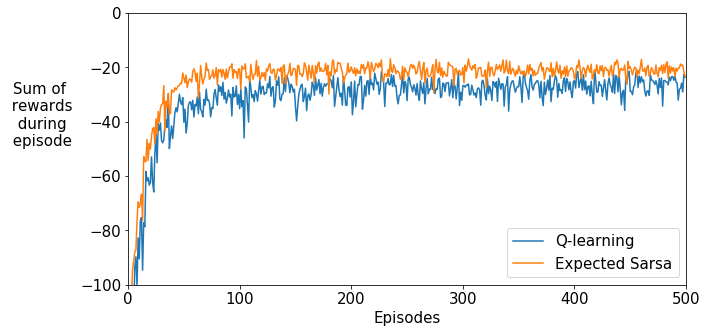

In [31]:
# Do not modify this cell!

agents = {
    "Q-learning": QLearningAgent,
    "Expected Sarsa": ExpectedSarsaAgent
}
env = cliffworld_env.Environment
all_reward_sums = {} # Contains sum of rewards during episode
all_state_visits = {} # Contains state visit counts during the last 10 episodes
agent_info = {"num_actions": 4, "num_states": 48, "epsilon": 0.1, "step_size": 0.5, "discount": 1.0}
env_info = {}
num_runs = 100 # The number of runs
num_episodes = 500 # The number of episodes in each run

for algorithm in ["Q-learning", "Expected Sarsa"]:
    all_reward_sums[algorithm] = []
    all_state_visits[algorithm] = []
    for run in tqdm(range(num_runs)):
        agent_info["seed"] = run
        rl_glue = RLGlue(env, agents[algorithm])
        rl_glue.rl_init(agent_info, env_info)

        reward_sums = []
        state_visits = np.zeros(48)
#         last_episode_total_reward = 0
        for episode in range(num_episodes):
            if episode < num_episodes - 10:
                # Runs an episode
                rl_glue.rl_episode(0) 
            else: 
                # Runs an episode while keeping track of visited states
                state, action = rl_glue.rl_start()
                state_visits[state] += 1
                is_terminal = False
                while not is_terminal:
                    reward, state, action, is_terminal = rl_glue.rl_step()
                    state_visits[state] += 1
                
            reward_sums.append(rl_glue.rl_return())
#             last_episode_total_reward = rl_glue.rl_return()
            
        all_reward_sums[algorithm].append(reward_sums)
        all_state_visits[algorithm].append(state_visits)

# save results
import os
import shutil
os.makedirs('results', exist_ok=True)
np.save('results/q_learning.npy', all_reward_sums['Q-learning'])
np.save('results/expected_sarsa.npy', all_reward_sums['Expected Sarsa'])
shutil.make_archive('results', 'zip', '.', 'results')

        
for algorithm in ["Q-learning", "Expected Sarsa"]:
    plt.plot(np.mean(all_reward_sums[algorithm], axis=0), label=algorithm)
plt.xlabel("Episodes")
plt.ylabel("Sum of\n rewards\n during\n episode",rotation=0, labelpad=40)
plt.xlim(0,500)
plt.ylim(-100,0)
plt.legend()
plt.show()

To see why these two agents behave differently, let's inspect the states they visit most. Run the cell below to generate plots showing the number of timesteps that the agents spent in each state over the last 10 episodes.

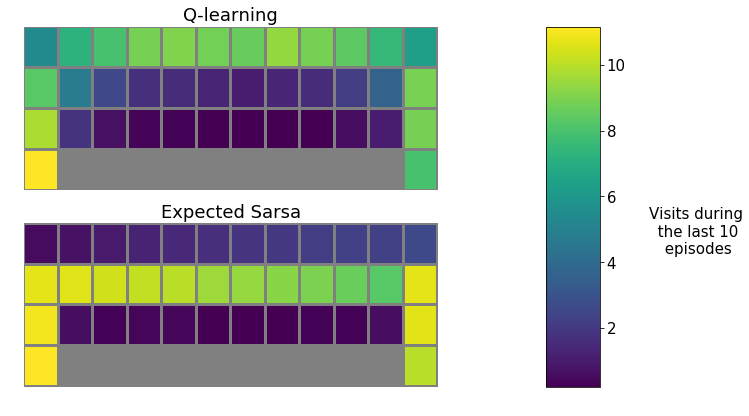

In [32]:
# Do not modify this cell!

for algorithm, position in [("Q-learning", 211), ("Expected Sarsa", 212)]:
    plt.subplot(position)
    average_state_visits = np.array(all_state_visits[algorithm]).mean(axis=0)
    grid_state_visits = average_state_visits.reshape((4,12))
    grid_state_visits[0,1:-1] = np.nan
    plt.pcolormesh(grid_state_visits, edgecolors='gray', linewidth=2)
    plt.title(algorithm)
    plt.axis('off')
    cm = plt.get_cmap()
    cm.set_bad('gray')

    plt.subplots_adjust(bottom=0.0, right=0.7, top=1.0)
    cax = plt.axes([0.85, 0.0, 0.075, 1.])
cbar = plt.colorbar(cax=cax)
cbar.ax.set_ylabel("Visits during\n the last 10\n episodes", rotation=0, labelpad=70)
plt.show()

The Q-learning agent learns the optimal policy, one that moves along the cliff and reaches the goal in as few steps as possible. However, since the agent does not follow the optimal policy and uses $\epsilon$-greedy exploration, it occasionally falls off the cliff. The Expected Sarsa agent takes exploration into account and follows a safer path. Note this is different from the book. The book shows Sarsa learns the even safer path


Previously we used a fixed step-size of 0.5 for the agents. What happens with other step-sizes? Does this difference in performance persist?

In the next experiment we will try 10 different step-sizes from 0.1 to 1.0 and compare the sum of rewards per episode averaged over the first 100 episodes (similar to the interim performance curves in Figure 6.3 of the textbook). Shaded regions show standard errors.

This cell takes around 10 minutes to run. The result of this cell will be graded. If you make any changes to your algorithms, you have to run this cell again before submitting the assignment.



  0%|          | 0/100 [00:00<?, ?it/s]

  1%|          | 1/100 [00:00<00:18,  5.47it/s]

  2%|▏         | 2/100 [00:00<00:16,  5.85it/s]

  3%|▎         | 3/100 [00:00<00:16,  6.05it/s]

  4%|▍         | 4/100 [00:00<00:14,  6.55it/s]

  5%|▌         | 5/100 [00:00<00:13,  6.97it/s]

  6%|▌         | 6/100 [00:00<00:13,  7.13it/s]

  7%|▋         | 7/100 [00:00<00:13,  7.14it/s]

  8%|▊         | 8/100 [00:01<00:12,  7.12it/s]

  9%|▉         | 9/100 [00:01<00:12,  7.24it/s]

 10%|█         | 10/100 [00:01<00:12,  7.10it/s]

 11%|█         | 11/100 [00:01<00:12,  6.89it/s]

 12%|█▏        | 12/100 [00:01<00:12,  6.94it/s]

 13%|█▎        | 13/100 [00:01<00:12,  7.21it/s]

 14%|█▍        | 14/100 [00:01<00:11,  7.55it/s]

 15%|█▌        | 15/100 [00:02<00:11,  7.28it/s]

 16%|█▌        | 16/100 [00:02<00:11,  7.53it/s]

 17%|█▋        | 17/100 [00:02<00:10,  7.77it/s]

 18%|█▊        | 18/100 [00:02<00:11,  7.38it/s]

 19%|█▉        | 19/100 [00:02<00:11,  7.23it/s]

 20%|██        |

 77%|███████▋  | 77/100 [00:07<00:02, 10.61it/s]

 79%|███████▉  | 79/100 [00:07<00:01, 10.74it/s]

 81%|████████  | 81/100 [00:07<00:01, 11.19it/s]

 83%|████████▎ | 83/100 [00:07<00:01, 11.68it/s]

 85%|████████▌ | 85/100 [00:07<00:01, 10.37it/s]

 87%|████████▋ | 87/100 [00:08<00:01, 10.04it/s]

 89%|████████▉ | 89/100 [00:08<00:01, 10.63it/s]

 91%|█████████ | 91/100 [00:08<00:00, 10.24it/s]

 93%|█████████▎| 93/100 [00:08<00:00, 10.03it/s]

 95%|█████████▌| 95/100 [00:08<00:00, 10.44it/s]

 97%|█████████▋| 97/100 [00:09<00:00, 10.16it/s]

100%|██████████| 100/100 [00:09<00:00, 10.60it/s][A


  0%|          | 0/100 [00:00<?, ?it/s]

  2%|▏         | 2/100 [00:00<00:08, 11.08it/s]

  4%|▍         | 4/100 [00:00<00:08, 11.49it/s]

  6%|▌         | 6/100 [00:00<00:08, 11.60it/s]

  8%|▊         | 8/100 [00:00<00:07, 11.67it/s]

 10%|█         | 10/100 [00:00<00:07, 11.81it/s]

 12%|█▏        | 12/100 [00:00<00:06, 12.68it/s]

 14%|█▍        | 14/100 [00:01<00:06, 13.07it/s]

 16%|█▌  

 64%|██████▍   | 64/100 [00:04<00:02, 14.14it/s]

 66%|██████▌   | 66/100 [00:04<00:02, 15.14it/s]

 68%|██████▊   | 68/100 [00:04<00:02, 14.69it/s]

 70%|███████   | 70/100 [00:04<00:01, 15.28it/s]

 72%|███████▏  | 72/100 [00:04<00:01, 14.90it/s]

 74%|███████▍  | 74/100 [00:05<00:01, 14.60it/s]

 76%|███████▌  | 76/100 [00:05<00:01, 14.04it/s]

 78%|███████▊  | 78/100 [00:05<00:01, 14.05it/s]

 80%|████████  | 80/100 [00:05<00:01, 13.88it/s]

 82%|████████▏ | 82/100 [00:05<00:01, 14.52it/s]

 84%|████████▍ | 84/100 [00:05<00:01, 14.24it/s]

 86%|████████▌ | 86/100 [00:05<00:01, 13.98it/s]

 88%|████████▊ | 88/100 [00:06<00:00, 13.78it/s]

 90%|█████████ | 90/100 [00:06<00:00, 13.19it/s]

 92%|█████████▏| 92/100 [00:06<00:00, 13.44it/s]

 94%|█████████▍| 94/100 [00:06<00:00, 13.57it/s]

 96%|█████████▌| 96/100 [00:06<00:00, 13.61it/s]

 98%|█████████▊| 98/100 [00:06<00:00, 14.62it/s]

100%|██████████| 100/100 [00:06<00:00, 14.39it/s]


  0%|          | 0/100 [00:00<?, ?it/s]

  2%|▏ 

 52%|█████▏    | 52/100 [00:03<00:03, 14.05it/s]

 54%|█████▍    | 54/100 [00:03<00:03, 14.86it/s]

 56%|█████▌    | 56/100 [00:03<00:02, 16.01it/s]

 58%|█████▊    | 58/100 [00:03<00:02, 15.82it/s]

 60%|██████    | 60/100 [00:04<00:02, 16.15it/s]

 62%|██████▏   | 62/100 [00:04<00:02, 15.87it/s]

 64%|██████▍   | 64/100 [00:04<00:02, 16.17it/s]

 66%|██████▌   | 66/100 [00:04<00:02, 14.97it/s]

 68%|██████▊   | 68/100 [00:04<00:02, 15.87it/s]

 70%|███████   | 70/100 [00:04<00:01, 15.72it/s]

 72%|███████▏  | 72/100 [00:04<00:01, 15.49it/s]

 74%|███████▍  | 74/100 [00:04<00:01, 14.98it/s]

 76%|███████▌  | 76/100 [00:05<00:01, 15.09it/s]

 78%|███████▊  | 78/100 [00:05<00:01, 14.69it/s]

 80%|████████  | 80/100 [00:05<00:01, 14.99it/s]

 82%|████████▏ | 82/100 [00:05<00:01, 15.67it/s]

 84%|████████▍ | 84/100 [00:05<00:01, 14.94it/s]

 86%|████████▌ | 86/100 [00:05<00:00, 14.71it/s]

 88%|████████▊ | 88/100 [00:05<00:00, 14.90it/s]

 90%|█████████ | 90/100 [00:06<00:00, 14.93it/s]



 21%|██        | 21/100 [00:07<00:28,  2.76it/s]

 22%|██▏       | 22/100 [00:08<00:28,  2.77it/s]

 23%|██▎       | 23/100 [00:08<00:26,  2.93it/s]

 24%|██▍       | 24/100 [00:08<00:26,  2.82it/s]

 25%|██▌       | 25/100 [00:09<00:26,  2.80it/s]

 26%|██▌       | 26/100 [00:09<00:26,  2.79it/s]

 27%|██▋       | 27/100 [00:09<00:25,  2.87it/s]

 28%|██▊       | 28/100 [00:10<00:26,  2.74it/s]

 29%|██▉       | 29/100 [00:10<00:26,  2.64it/s]

 30%|███       | 30/100 [00:11<00:26,  2.64it/s]

 31%|███       | 31/100 [00:11<00:26,  2.65it/s]

 32%|███▏      | 32/100 [00:11<00:26,  2.61it/s]

 33%|███▎      | 33/100 [00:12<00:24,  2.78it/s]

 34%|███▍      | 34/100 [00:12<00:24,  2.73it/s]

 35%|███▌      | 35/100 [00:12<00:23,  2.78it/s]

 36%|███▌      | 36/100 [00:13<00:24,  2.66it/s]

 37%|███▋      | 37/100 [00:13<00:24,  2.60it/s]

 38%|███▊      | 38/100 [00:14<00:24,  2.53it/s]

 39%|███▉      | 39/100 [00:14<00:23,  2.60it/s]

 40%|████      | 40/100 [00:14<00:24,  2.46it/s]



 66%|██████▌   | 66/100 [00:17<00:09,  3.77it/s]

 67%|██████▋   | 67/100 [00:17<00:08,  3.89it/s]

 68%|██████▊   | 68/100 [00:17<00:07,  4.01it/s]

 69%|██████▉   | 69/100 [00:17<00:07,  3.98it/s]

 70%|███████   | 70/100 [00:17<00:07,  4.01it/s]

 71%|███████   | 71/100 [00:18<00:07,  4.09it/s]

 72%|███████▏  | 72/100 [00:18<00:06,  4.11it/s]

 73%|███████▎  | 73/100 [00:18<00:06,  4.17it/s]

 74%|███████▍  | 74/100 [00:18<00:06,  4.06it/s]

 75%|███████▌  | 75/100 [00:19<00:06,  4.13it/s]

 76%|███████▌  | 76/100 [00:19<00:05,  4.07it/s]

 77%|███████▋  | 77/100 [00:19<00:05,  4.19it/s]

 78%|███████▊  | 78/100 [00:19<00:05,  4.13it/s]

 79%|███████▉  | 79/100 [00:20<00:05,  3.96it/s]

 80%|████████  | 80/100 [00:20<00:05,  3.85it/s]

 81%|████████  | 81/100 [00:20<00:05,  3.73it/s]

 82%|████████▏ | 82/100 [00:21<00:05,  3.55it/s]

 83%|████████▎ | 83/100 [00:21<00:04,  3.64it/s]

 84%|████████▍ | 84/100 [00:21<00:04,  3.77it/s]

 85%|████████▌ | 85/100 [00:21<00:04,  3.67it/s]



 10%|█         | 10/100 [00:01<00:15,  5.69it/s]

 11%|█         | 11/100 [00:02<00:16,  5.50it/s]

 12%|█▏        | 12/100 [00:02<00:16,  5.35it/s]

 13%|█▎        | 13/100 [00:02<00:16,  5.35it/s]

 14%|█▍        | 14/100 [00:02<00:16,  5.26it/s]

 15%|█▌        | 15/100 [00:02<00:15,  5.46it/s]

 16%|█▌        | 16/100 [00:02<00:15,  5.58it/s]

 17%|█▋        | 17/100 [00:03<00:15,  5.37it/s]

 18%|█▊        | 18/100 [00:03<00:15,  5.26it/s]

 19%|█▉        | 19/100 [00:03<00:15,  5.21it/s]

 20%|██        | 20/100 [00:03<00:15,  5.12it/s]

 21%|██        | 21/100 [00:03<00:15,  5.08it/s]

 22%|██▏       | 22/100 [00:04<00:14,  5.44it/s]

 23%|██▎       | 23/100 [00:04<00:14,  5.35it/s]

 24%|██▍       | 24/100 [00:04<00:14,  5.22it/s]

 25%|██▌       | 25/100 [00:04<00:14,  5.03it/s]

 26%|██▌       | 26/100 [00:04<00:13,  5.36it/s]

 27%|██▋       | 27/100 [00:05<00:13,  5.54it/s]

 28%|██▊       | 28/100 [00:05<00:12,  5.68it/s]

 29%|██▉       | 29/100 [00:05<00:12,  5.50it/s]



 55%|█████▌    | 55/100 [00:09<00:07,  5.76it/s]

 56%|█████▌    | 56/100 [00:09<00:07,  6.16it/s]

 57%|█████▋    | 57/100 [00:09<00:06,  6.17it/s]

 58%|█████▊    | 58/100 [00:09<00:07,  5.91it/s]

 59%|█████▉    | 59/100 [00:10<00:07,  5.80it/s]

 60%|██████    | 60/100 [00:10<00:06,  5.73it/s]

 61%|██████    | 61/100 [00:10<00:06,  5.67it/s]

 62%|██████▏   | 62/100 [00:10<00:06,  5.63it/s]

 63%|██████▎   | 63/100 [00:10<00:06,  5.62it/s]

 64%|██████▍   | 64/100 [00:11<00:06,  5.44it/s]

 65%|██████▌   | 65/100 [00:11<00:06,  5.48it/s]

 66%|██████▌   | 66/100 [00:11<00:06,  5.62it/s]

 67%|██████▋   | 67/100 [00:11<00:05,  5.58it/s]

 68%|██████▊   | 68/100 [00:11<00:05,  5.58it/s]

 69%|██████▉   | 69/100 [00:11<00:05,  5.54it/s]

 70%|███████   | 70/100 [00:12<00:05,  5.97it/s]

 71%|███████   | 71/100 [00:12<00:04,  6.08it/s]

 72%|███████▏  | 72/100 [00:12<00:04,  5.75it/s]

 73%|███████▎  | 73/100 [00:12<00:04,  5.50it/s]

 74%|███████▍  | 74/100 [00:12<00:04,  5.84it/s]



100%|██████████| 100/100 [00:16<00:00,  6.22it/s]


  0%|          | 0/100 [00:00<?, ?it/s]

  1%|          | 1/100 [00:00<00:16,  6.13it/s]

  2%|▏         | 2/100 [00:00<00:14,  6.70it/s]

  3%|▎         | 3/100 [00:00<00:14,  6.68it/s]

  4%|▍         | 4/100 [00:00<00:15,  6.23it/s]

  5%|▌         | 5/100 [00:00<00:15,  5.94it/s]

  6%|▌         | 6/100 [00:00<00:15,  6.26it/s]

  7%|▋         | 7/100 [00:01<00:15,  5.99it/s]

  8%|▊         | 8/100 [00:01<00:15,  6.04it/s]

  9%|▉         | 9/100 [00:01<00:14,  6.31it/s]

 10%|█         | 10/100 [00:01<00:14,  6.32it/s]

 11%|█         | 11/100 [00:01<00:13,  6.69it/s]

 12%|█▏        | 12/100 [00:01<00:13,  6.56it/s]

 13%|█▎        | 13/100 [00:02<00:13,  6.52it/s]

 14%|█▍        | 14/100 [00:02<00:12,  6.78it/s]

 15%|█▌        | 15/100 [00:02<00:12,  6.63it/s]

 16%|█▌        | 16/100 [00:02<00:12,  6.96it/s]

 17%|█▋        | 17/100 [00:02<00:12,  6.74it/s]

 18%|█▊        | 18/100 [00:02<00:11,  6.92it/s]

 19%|█▉        |

 44%|████▍     | 44/100 [00:06<00:08,  6.87it/s]

 45%|████▌     | 45/100 [00:06<00:08,  6.74it/s]

 46%|████▌     | 46/100 [00:06<00:08,  6.65it/s]

 47%|████▋     | 47/100 [00:06<00:08,  6.61it/s]

 48%|████▊     | 48/100 [00:07<00:07,  6.57it/s]

 49%|████▉     | 49/100 [00:07<00:07,  6.55it/s]

 50%|█████     | 50/100 [00:07<00:07,  6.54it/s]

 51%|█████     | 51/100 [00:07<00:07,  6.68it/s]

 52%|█████▏    | 52/100 [00:07<00:07,  6.66it/s]

 53%|█████▎    | 53/100 [00:07<00:07,  6.63it/s]

 54%|█████▍    | 54/100 [00:08<00:06,  6.83it/s]

 55%|█████▌    | 55/100 [00:08<00:06,  7.08it/s]

 56%|█████▌    | 56/100 [00:08<00:06,  6.89it/s]

 57%|█████▋    | 57/100 [00:08<00:06,  6.72it/s]

 58%|█████▊    | 58/100 [00:08<00:05,  7.10it/s]

 59%|█████▉    | 59/100 [00:08<00:05,  7.22it/s]

 60%|██████    | 60/100 [00:08<00:05,  6.99it/s]

 61%|██████    | 61/100 [00:09<00:05,  6.81it/s]

 62%|██████▏   | 62/100 [00:09<00:05,  6.74it/s]

 63%|██████▎   | 63/100 [00:09<00:05,  6.65it/s]



 89%|████████▉ | 89/100 [00:12<00:01,  7.09it/s]

 90%|█████████ | 90/100 [00:12<00:01,  7.05it/s]

 91%|█████████ | 91/100 [00:12<00:01,  7.02it/s]

 92%|█████████▏| 92/100 [00:12<00:01,  7.01it/s]

 93%|█████████▎| 93/100 [00:13<00:00,  7.12it/s]

 94%|█████████▍| 94/100 [00:13<00:00,  6.84it/s]

 95%|█████████▌| 95/100 [00:13<00:00,  6.78it/s]

 96%|█████████▌| 96/100 [00:13<00:00,  6.81it/s]

 97%|█████████▋| 97/100 [00:13<00:00,  6.85it/s]

 98%|█████████▊| 98/100 [00:13<00:00,  6.83it/s]

 99%|█████████▉| 99/100 [00:13<00:00,  6.85it/s]

100%|██████████| 100/100 [00:14<00:00,  7.08it/s]


  0%|          | 0/100 [00:00<?, ?it/s]

  1%|          | 1/100 [00:00<00:14,  6.91it/s]

  2%|▏         | 2/100 [00:00<00:14,  6.92it/s]

  3%|▎         | 3/100 [00:00<00:13,  7.20it/s]

  4%|▍         | 4/100 [00:00<00:13,  7.17it/s]

  5%|▌         | 5/100 [00:00<00:13,  7.12it/s]

  6%|▌         | 6/100 [00:00<00:13,  7.14it/s]

  7%|▋         | 7/100 [00:00<00:13,  6.89it/s]

  8%|▊        

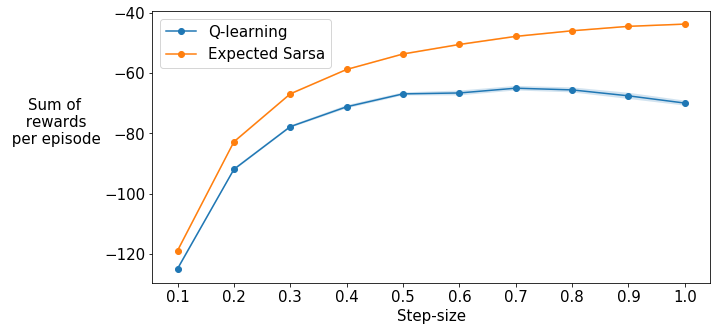

In [35]:
# Do not modify this cell!

agents = {
    "Q-learning": QLearningAgent,
    "Expected Sarsa": ExpectedSarsaAgent
}
env = cliffworld_env.Environment
all_reward_sums = {}
step_sizes = np.linspace(0.1,1.0,10)
agent_info = {"num_actions": 4, "num_states": 48, "epsilon": 0.1, "discount": 1.0}
env_info = {}
num_runs = 100
num_episodes = 100
all_reward_sums = {}

for algorithm in ["Q-learning", "Expected Sarsa"]:
    for step_size in step_sizes:
        all_reward_sums[(algorithm, step_size)] = []
        agent_info["step_size"] = step_size
        for run in tqdm(range(num_runs)):
            agent_info["seed"] = run
            rl_glue = RLGlue(env, agents[algorithm])
            rl_glue.rl_init(agent_info, env_info)

            return_sum = 0
            for episode in range(num_episodes):
                rl_glue.rl_episode(0)
                return_sum += rl_glue.rl_return()
            all_reward_sums[(algorithm, step_size)].append(return_sum/num_episodes)
        

for algorithm in ["Q-learning", "Expected Sarsa"]:
    algorithm_means = np.array([np.mean(all_reward_sums[(algorithm, step_size)]) for step_size in step_sizes])
    algorithm_stds = np.array([sem(all_reward_sums[(algorithm, step_size)]) for step_size in step_sizes])
    plt.plot(step_sizes, algorithm_means, marker='o', linestyle='solid', label=algorithm)
    plt.fill_between(step_sizes, algorithm_means + algorithm_stds, algorithm_means - algorithm_stds, alpha=0.2)

plt.legend()
plt.xlabel("Step-size")
plt.ylabel("Sum of\n rewards\n per episode",rotation=0, labelpad=50)
plt.xticks(step_sizes)
plt.show()

## Wrapping up

Expected Sarsa shows an advantage over Q-learning in this problem across a wide range of step-sizes.

Congratulations! Now you have:

- implemented Q-Learning with $\epsilon$-greedy action selection
- implemented Expected Sarsa with $\epsilon$-greedy action selection
- investigated the behavior of these two algorithms on Cliff World

To submit your solution, you will need to submit the `results.zip` file generated by the experiments. Here are the steps:

- Go to the `file` menu at the top of the screen
- Select `open`
- Click the selection square next to `results.zip`
- Select `Download` from the top menu
- Upload that file to the grader in the next part of this module
